In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance as EMD

#### To change data and model do the following
1. change data input
2. change model check point input
3. change data normalization scaler input

In [41]:
data = np.genfromtxt('./data/Rayleigh_P30_downsampled_flat_extended.csv',delimiter=',',skip_header=True)
cord = np.genfromtxt('./data/downsampled_points.csv',delimiter=',',skip_header=True)
avg = np.mean(data,axis=0)

In [42]:
data.shape

(46200, 2382)

/var/folders/hf/j0cnbrtd4fbcfm7nf1yyzbf40000gn/T/ipykernel_67255/3311405877.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


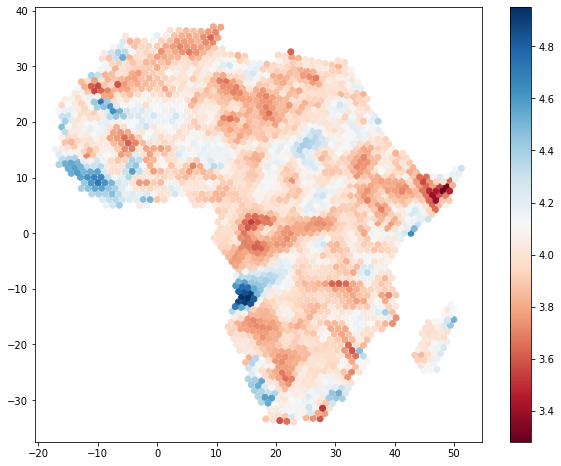

In [43]:
fig = plt.figure(figsize=(10,8))
plt.scatter(cord[:,0],cord[:,1],c=avg,cmap='RdBu')
plt.colorbar()
plt.show()

In [55]:
import torch
from generative_model import *

model = WGAN_SIMPLE(ndim=2382)
checkpoint = torch.load('./model/WGAN_Simple_lr0.0002_beta0.5_last210000/WGAN_Simple_epoch199.model')
# checkpoint = torch.load('./model/WGAN_Simple_epoch199.model')
model.load_state_dict(checkpoint["model_state_dict"])

fake_data = model.gen(torch.randn(128, model.nlatent, device="cpu")).detach().numpy()

In [56]:
# generate 10,000 mcmc samples using trained WGAN
fake_data = np.zeros((100000,2382))
for i in range(1000):
    left_idx = 100 * i
    right_idx = 100 * (i+1)
    fake_data[left_idx:right_idx,:] = model.gen(torch.randn(100, model.nlatent, device="cpu")).detach().numpy()
fake_avg = np.mean(fake_data,axis=0)

In [57]:
# load the scalar
scaler_file = open('./data/whole_scaler_extended.pkl', 'rb')
scaler = pickle.load(scaler_file)

/var/folders/hf/j0cnbrtd4fbcfm7nf1yyzbf40000gn/T/ipykernel_67255/3219833920.py:8: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


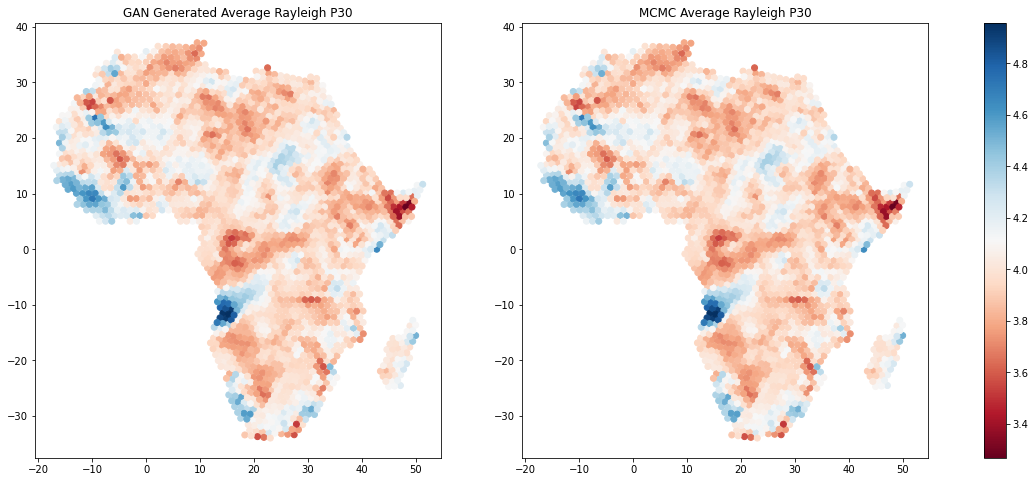

In [58]:
fig, axes = plt.subplots(1,2,figsize=(20,8))
axes = axes.flatten()
fig_fake = axes[0].scatter(cord[:,0],cord[:,1],c=scaler.inverse_transform(fake_avg),cmap='RdBu')
axes[0].set_title('GAN Generated Average Rayleigh P30')
fig_real = axes[1].scatter(cord[:,0],cord[:,1],c=avg,cmap='RdBu')
axes[1].set_title('MCMC Average Rayleigh P30')
plt.colorbar(fig_fake,ax=axes)

In [59]:
# compare the difference between the averages
gan_average_scaled = scaler.inverse_transform(fake_avg)
diff = np.sum(np.absolute(gan_average_scaled-avg))
diff/2382

0.007449513496794246

In [60]:
fake_data_scaled = scaler.inverse_transform(fake_data)

/var/folders/hf/j0cnbrtd4fbcfm7nf1yyzbf40000gn/T/ipykernel_67255/4265716813.py:11: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


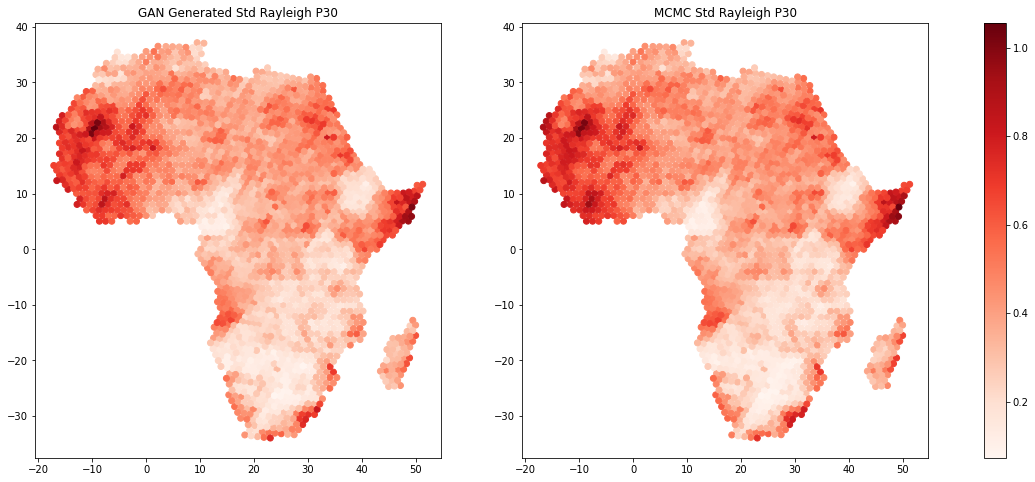

In [61]:
# compute std
real_std = np.std(data,axis=0)
fake_std = np.std(fake_data_scaled,axis=0)
fig, axes = plt.subplots(1,2,figsize=(20,8))
axes = axes.flatten()
fig_fake = axes[0].scatter(cord[:,0],cord[:,1],c=fake_std,cmap='Reds') 
axes[0].set_title('GAN Generated Std Rayleigh P30')
fig_real = axes[1].scatter(cord[:,0],cord[:,1],c=real_std,cmap='Reds') 
axes[1].set_title('MCMC Std Rayleigh P30') 
plt.colorbar(fig_real,ax=axes)
plt.show()